# Bank Marketing Project
Problem Statement:
Bank Marketing Project

Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).



Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).



Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular', 'telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')



# importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loadding tht dataset

In [3]:
df=pd.read_csv('banking.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Top 5 heads of the dataset.

In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


Bottom 5 of the dataset.

# EDA

In [6]:
# checking shape
df.shape

(11162, 17)

We have 11162 rows and 17 columns in the dataset.

In [7]:
# checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


 7 integer data type columns and 10 object data types columns present in the dataset.

In [8]:
# checking null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

No null values present in the dataset.

# EXPLORATORY DATA ANALYSIS for nominal data

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


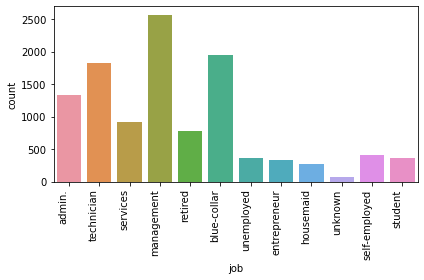

In [13]:
ax=sns.countplot(x='job',data=df)
print(df['job'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

In Job column , management type job is high with 2566 numbers of jobs, and unkown job is low.

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


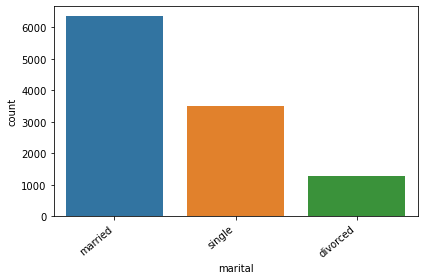

In [14]:
ax=sns.countplot(x='marital',data=df)
print(df['marital'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

The total number of married are 6351, single are 3518 and divorced are 1293.

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


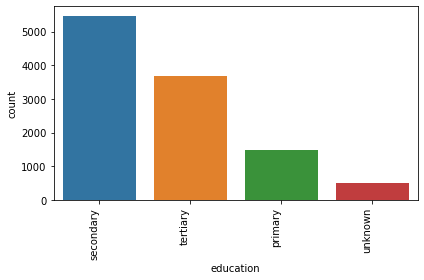

In [15]:
ax=sns.countplot(x='education',data=df)
print(df['education'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

peoples with secondary education is high with 5476 numbers and peoples with unknown education is 497.

no     10994
yes      168
Name: default, dtype: int64


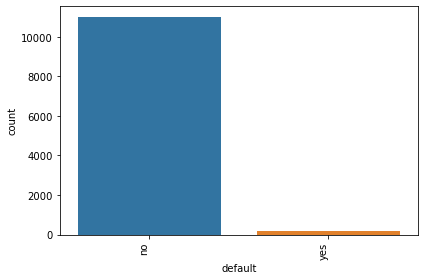

In [16]:
ax=sns.countplot(x='default',data=df)
print(df['default'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

There is very big differnce in default column between yes and no.

no     5881
yes    5281
Name: housing, dtype: int64


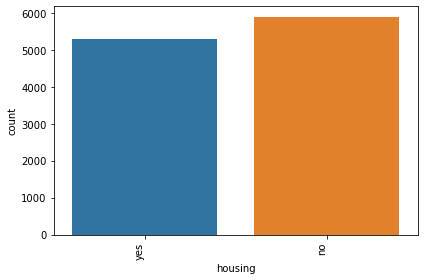

In [18]:
ax=sns.countplot(x='housing',data=df)
print(df['housing'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

Peoples with housing is less, and peoples with no housing is high.

no     9702
yes    1460
Name: loan, dtype: int64


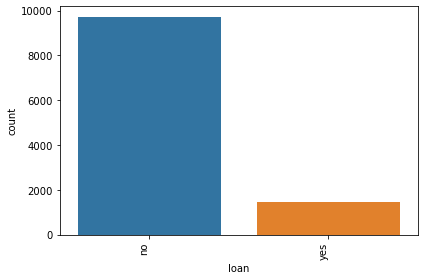

In [19]:
ax=sns.countplot(x='loan',data=df)
print(df['loan'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

In loan column the total number of no is  and the total number of yes is 1460. 

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


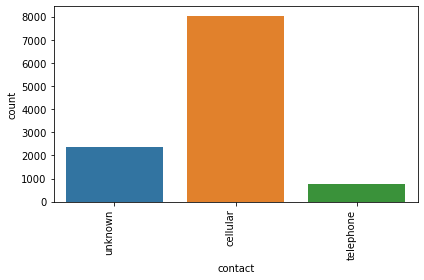

In [20]:
ax=sns.countplot(x='contact',data=df)
print(df['contact'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

peoples with cellular contacts is more than unknown contacts and telephone contacts.

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
1     122
24    122
Name: day, dtype: int64


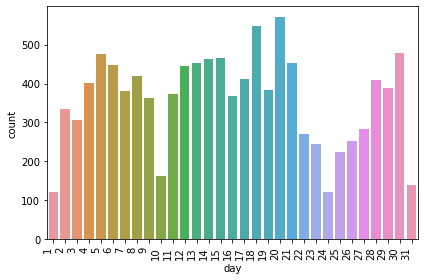

In [21]:
ax=sns.countplot(x='day',data=df)
print(df['day'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

Not much difference in the day column.

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64


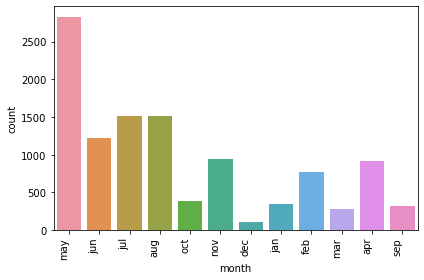

In [22]:
ax=sns.countplot(x='month',data=df)
print(df['month'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

In month column, the total number of persons is 2824 with maximum numbers, and after that there is bit decline in every month.

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
19       5
20       5
24       5
30       4
22       4
25       3
23       3
26       3
43       2
29       2
32       2
28       1
27       1
41       1
33       1
31       1
63       1
Name: campaign, dtype: int64


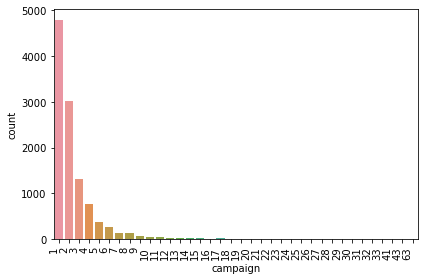

In [24]:
ax=sns.countplot(x='campaign',data=df)
print(df['campaign'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

In campaign column there is  some numbers between 1 to 9 after there is very low numbers that is 1 or 2.

In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


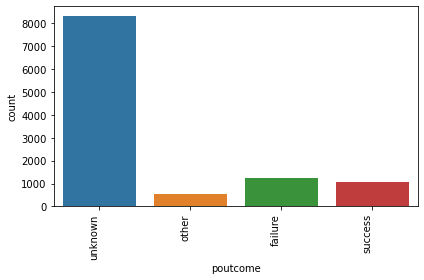

In [26]:
ax=sns.countplot(x='poutcome',data=df)
print(df['poutcome'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

In poutcome column ,unknown is maximum with 8326 numbers, failure, success and other is very low.

no     5873
yes    5289
Name: deposit, dtype: int64


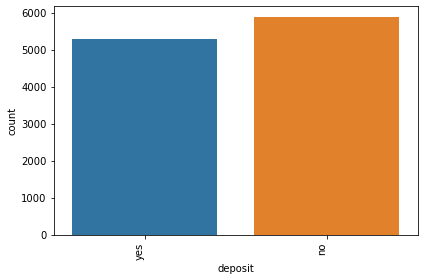

In [27]:
ax=sns.countplot(x='deposit',data=df)
print(df['deposit'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

Not much diference between yes and no in deposit column.

# EXPLORATORY DATA ANALYSIS for numerical data

<AxesSubplot:xlabel='age', ylabel='Density'>

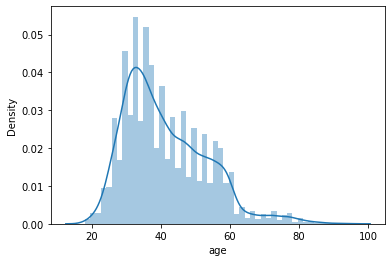

In [28]:
sns.distplot(df['age'],kde=True)

age is in range between 20 to 100 with little bit left skewed.

<AxesSubplot:xlabel='balance', ylabel='Density'>

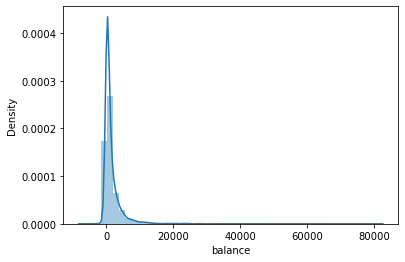

In [30]:
sns.distplot(df['balance'],kde=True)

balance is range in between 0 to 20000.

<AxesSubplot:xlabel='duration', ylabel='Density'>

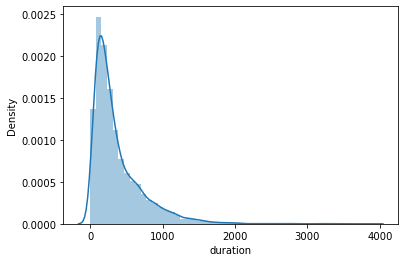

In [31]:
sns.distplot(df['duration'],kde=True)

duration column is left skewed and ranges in between 0 to 2000.

<AxesSubplot:xlabel='previous', ylabel='Density'>

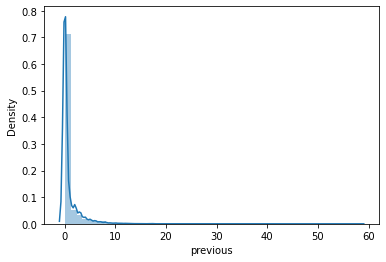

In [33]:
sns.distplot(df['previous'],kde=True)

Previous column is left skewed with ranges in between 0 to 10.

# CHECKING OUTLIERS

age            AxesSubplot(0.125,0.71587;0.0945122x0.16413)
balance     AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
day         AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
duration    AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
campaign    AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
pdays       AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
previous    AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
dtype: object

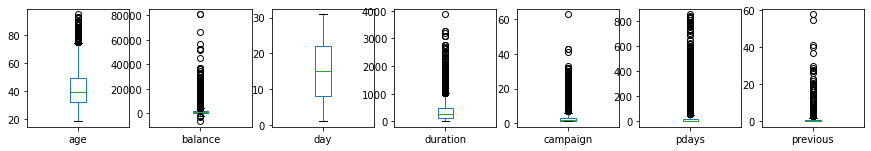

In [34]:
df.plot(kind='box', subplots=True ,layout=(4,7),figsize=(15,10))

outliers are present in the columns.

# Checking skewness

In [35]:
df.skew()

age         0.862780
balance     8.224619
day         0.111330
duration    2.143695
campaign    5.545578
pdays       2.449986
previous    7.335298
dtype: float64

balance , duration , campaignn, pdays and previous columns are looking skewed.

# ENCODING THE DATAFRAME TO CONVERT STRING COLUMNS TO NUMERIC COLUMNS

In [4]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i])

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


Now all the object type columns has been converted into numeric columns

# outlier removal

In [6]:
from scipy.stats import zscore

In [7]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    1,    11,    12, ..., 11126, 11140, 11146], dtype=int64),
 array([11, 11, 11, ...,  4, 12,  4], dtype=int64))

In [8]:
df_=df[(z<3).all(axis=1)]
df_

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
5,42,4,2,2,0,0,1,1,2,5,8,562,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [9]:
df.shape

(11162, 17)

In [11]:
df_.shape

(9942, 17)

1220 rows  has been removed as a outliers.

In [12]:
df_.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Removing skewness

In [47]:
df.skew()

age          0.862780
job          0.184306
marital     -0.173968
education    0.115543
default      7.966983
balance      8.224619
housing      0.107678
loan         2.190201
contact      1.182309
day          0.111330
month       -0.322998
duration     2.143695
campaign     5.545578
pdays        2.449986
previous     7.335298
poutcome    -1.718276
deposit      0.104798
dtype: float64

In [48]:
ds=df_new

In [49]:
ds['balance']=np.log(df['balance'])
ds['previous']=np.log(df['previous'])

In [51]:
ds.skew()

age          0.637244
job          0.192465
marital     -0.178121
education    0.113498
default      0.000000
balance           NaN
housing      0.091035
loan         2.188169
contact      1.179558
day          0.132012
month       -0.353554
duration     1.358903
campaign     1.976247
pdays        2.114976
previous          NaN
poutcome    -1.855705
deposit      0.167985
dtype: float64

 so skewness removal will not considered further beacuse data is becoming NaN and some of the outliers has been removed during outlier removal. so new variable will move ahead.

In [52]:
df_new.skew()

age          0.637244
job          0.192465
marital     -0.178121
education    0.113498
default      0.000000
balance           NaN
housing      0.091035
loan         2.188169
contact      1.179558
day          0.132012
month       -0.353554
duration     1.358903
campaign     1.976247
pdays        2.114976
previous          NaN
poutcome    -1.855705
deposit      0.167985
dtype: float64

# statistical summary

In [13]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


Number of values is same in all the columns.

Not much difference between mean and median(50%) , except balance, pdays, and duration columns.

In balance, pdays, and duration columns there is differnce between 75% and max.



# checking correlation

<AxesSubplot:>

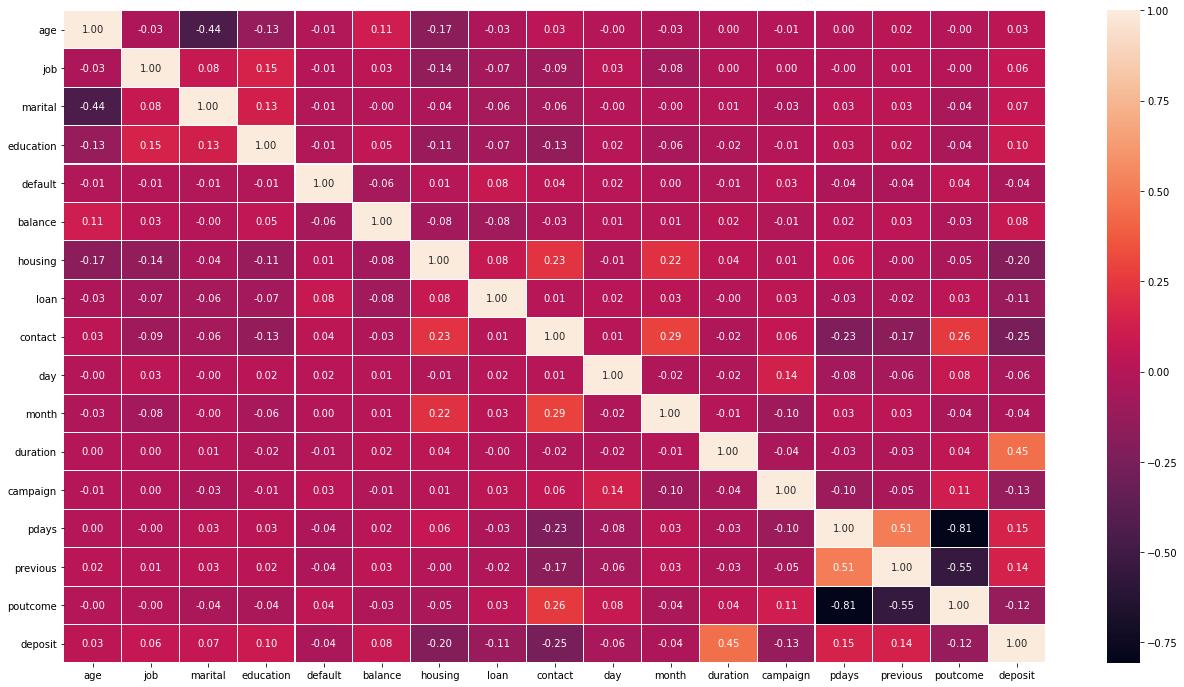

In [14]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,linewidths =0.1,fmt='0.2f')

Our target column deposit is showing some positive correlations with duration column.

Contact and housing column is negatively correlated with the target column deposit.

poutcome column is negatively correlated with pdays column.

# separting the columns into x and y

In [15]:
x=df.drop('deposit',axis=1)
y=df['deposit']

In [16]:
x.shape

(11162, 16)

In [17]:
y.shape

(11162,)

# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=48)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8371, 16)
(2791, 16)
(8371,)
(2791,)


# Importing libraries

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Model building

In [21]:
#LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    
    

0.7581512002866356
[[1193  283]
 [ 392  923]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1476
           1       0.77      0.70      0.73      1315

    accuracy                           0.76      2791
   macro avg       0.76      0.76      0.76      2791
weighted avg       0.76      0.76      0.76      2791



In [22]:
# Logistic Regression Cross Validation

scr=cross_val_score(lr,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.746098759725011


Accuracy score is 75.85 and  cv score is 74.60

In [25]:
# AUC ROC CURVE Logistic Regression
lr.fit(x_train,y_train)
y_pred_proba=lr.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)


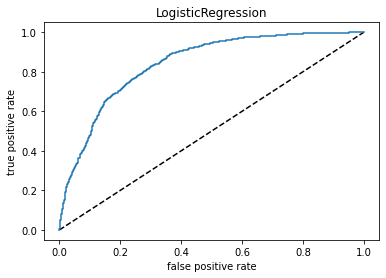

0.7550833616701187


In [27]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('LogisticRegression')
plt.show()

auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

Auc_score of Logistic Regression is 75.50%.

In [28]:
# adaboost classifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8208527409530634
[[1247  229]
 [ 271 1044]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1476
           1       0.82      0.79      0.81      1315

    accuracy                           0.82      2791
   macro avg       0.82      0.82      0.82      2791
weighted avg       0.82      0.82      0.82      2791



In [29]:
# cross validation adaboost classifier
score=cross_val_score(ad,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.7803341696000204


accuracy score is 82.05 and cv score is 78.03.

In [30]:
# AUC ROC curve adaboost classifier
ad.fit(x_train,y_train)
y_pred_proba=ad.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)


In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('LogisticRegression')
plt.show()

auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.8193836491596854


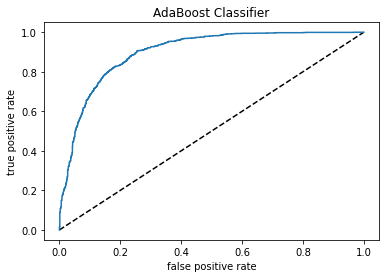

In [32]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AdaBoost Classifier')

auc_score=roc_auc_score(y_test,ad.predict(x_test))
print(auc_score)

Auc_score of adaboost classifier is 81.93

In [35]:
# Random forest classifer
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8427087065567896
[[1215  261]
 [ 178 1137]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1476
           1       0.81      0.86      0.84      1315

    accuracy                           0.84      2791
   macro avg       0.84      0.84      0.84      2791
weighted avg       0.84      0.84      0.84      2791



In [37]:
# Cross validation random forest classifier
score=cross_val_score(rf,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.8081964167336804


Accuracy score is 84.27% and cv score is 80.81%

In [39]:
# AUC ROC Curve of Random Forest classifier
rf.fit(x_train,y_train)
y_pred_proba=rf.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

0.8451768215400787


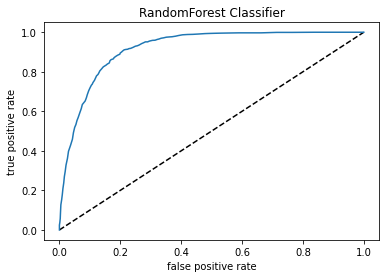

In [40]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForset Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('RandomForest Classifier')

auc_score=roc_auc_score(y_test,rf.predict(x_test))
print(auc_score)

Auc_score is 84.51%

# Hyper Parameter Tuning

In [64]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier(max_depth=6,random_state=0)

grid_param={'criterion':['gini','entropy']}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)


gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)
                  
                   
                   

{'criterion': 'gini'}
0.7761238637768115


# FINAL MODEL

In [67]:
final_model=RandomForestClassifier(criterion='gini')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

84.4858473665353


After Hyper Parameter Tuning the accuracy score is predicting 84.48%. So we can say our model performance is good.

# saving the model

In [68]:
import pickle
filename='banking.pkl'
pickle.dump(rf,open(filename,'wb'))

# CONCLUSION

In [71]:
loaded_model=pickle.load(open('churns.pkl','rb'))
loaded_model.fit(x_train,y_train)
result=loaded_model.score(x_test, y_test)
print(result)

0.8423504120386958


With the help of MODEL , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on target columns..

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.

​